<a href="https://colab.research.google.com/github/codingCapricorn/MCMC-Algorithm-Implementation/blob/master/Simulations_Using_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Take A View At Different Numerical Simulations Approaches:::
    1.Black Scholes
  
    2.Binary Tree
  
    3.Monte Carlo

The differences in the three approaches (Trees, Black Scholes and Monte Carlo Simulation) arise on account of the resources required to run the model and the time required to build the model. The Black Scholes model is a simple closed form equation. If you have all the relevant inputs you have an answer. The only issue is that closed form solutions only exist for a limited universe of instruments. Trees require limited resources but get complex very quickly for more complex structures. A Monte Carlo as we have seen only takes a trivial effort to setup but running 100,000 simulation on a large portfolio of exotic contracts may take more time and more hardware than you may have access to.

#Binary Tree Simulation :::::

For the below developed binomial tree model for a STOCK PRICE, we assume that at each time step, the stock could be in either up or down states with unequal payoffs characteristic of a risky security. Assuming the initial stock price at time $t=0$ is \$1, at the next time step $t=1$ the price is $u$ in the up state and $d$ in the down state with up-state transition probability $p$.

##Binomial trees have two serious drawbacks::
(1)It is discrete and therefore assumes all events to take place at these discrete nodes and certainly adding more and more branches and nodes will increase the accuracy of the estimation and in the limiting case this tree will approximate a closed form solution.

(2)The second major drawback of trees is that they (at least the simple ones) cannot accommodate varying volatility between the nodes;which will cause the tree to bend and distort its shape.



In [ ]:
%matplotlib inline
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#model parameters
mu = 0.1      #mean
sigma = 0.15  #volatility
S0 = 1        #starting price
    
N = 10000     #number of simulations
T = [21.0/252, 1.0]  #time horizon in years
step = 1.0/252       #time step in years

In [ ]:
#compute state price and probability
u = np.exp(sigma * np.sqrt(step))    #up state price
d = 1.0/u                            #down state price
p = 0.5+0.5*(mu/sigma)*np.sqrt(step) #prob of up state

#Binary Tree with Monte Carlo Simulation ::::
We can use Monte Carlo simulations to generate uncertainty estimates of the terminal stock price after some time horizon $T$. When using a binomial model to describe the price process of the stock, we can use the following callibration:



$$\begin{eqnarray}
u = \exp \bigg(\sigma \sqrt{T/n}\bigg) = 1/d \\
p = \frac{1}{2} + \frac{1}{2}\bigg(\frac{\mu}{\sigma}\bigg)\sqrt{T/n}
\end{eqnarray}$$


where $T$ is the length of prediction horizon in years and $n$ is the number of time steps. We assume $1$ year equals $252$ trading days, $1$ month equals $21$ days, $1$ week equals $5$ days and $1$ day equals $8$ hours. Let's simulate the stock price using the binomial model with a daily time step for two different time horizons: $1$ month from today and $1$ year from today.




In [ ]:
#binomial tree simulation
up_times = np.zeros((N, len(T)))
down_times = np.zeros((N, len(T)))
for idx in range(len(T)):
    up_times[:,idx] = np.random.binomial(T[idx]/step, p, N)
    down_times[:,idx] = T[idx]/step - up_times[:,idx]

In [ ]:
#compute terminal price
ST = S0 * u**up_times * d**down_times

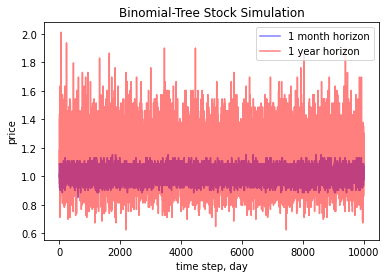

In [ ]:
#generate plots
plt.figure()
plt.plot(ST[:,0], color='b', alpha=0.5, label='1 month horizon')
plt.plot(ST[:,1], color='r', alpha=0.5, label='1 year horizon')
plt.xlabel('time step, day')
plt.ylabel('price')
plt.title('Binomial-Tree Stock Simulation')
plt.legend()
plt.show()

#MC Simulation has these two advantages over other simulations ::::

(1)No matter what the assets and the nature of their interaction you can completely strip of the mathematical construct of these assets and simply assuming a random normal path (geometric Brownian motion) simulate the forward movement of the assets

(2)Secondly, using a series of IF....THEN....ELSEIF....THEN statements we can simulate the payoff at termination.

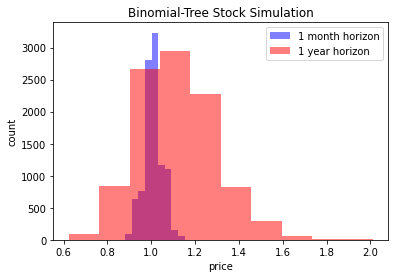

In [ ]:
plt.figure()
plt.hist(ST[:,0], color='b', alpha=0.5, label='1 month horizon')
plt.hist(ST[:,1], color='r', alpha=0.5, label='1 year horizon')
plt.xlabel('price')
plt.ylabel('count')
plt.title('Binomial-Tree Stock Simulation')
plt.legend()
plt.show()

We can see from the above plots that our yearly estimates have higher volatility compared to the monthly estimates.